In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:

data   = pd.read_excel('/Users/samaksh/Documents/Spring 23/Best Buy Project week/Hackathon Data.xlsx')

In [3]:
data['PROMO_PRICE'] = data['PROMO_PRICE'].replace('?', np.nan)
data['COMPETITOR_PRICE'] = data['COMPETITOR_PRICE'].replace('?', np.nan)

In [35]:
data.head(10)

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,month,year
25278,1,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017
477142,1,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017
105644,1,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017
557591,1,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017
175691,1,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,6,2017
661747,1,2017-06-02,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,4,6,2017
231630,1,2017-06-03,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,7,6,2017
813377,1,2017-06-04,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,4,6,2017
472762,1,2017-06-05,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,2,6,2017
111456,1,2017-06-06,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,4,6,2017


In [5]:
data = data.sort_values(by = ['Encoded_SKU_ID','SALES_DATE'])

In [6]:
data.shape

(846632, 11)

In [15]:
#Getting External Data
consumer_sentiment_data = pd.read_excel('/Users/samaksh/Documents/Spring 23/Best Buy Project week/consumer_sentiment_clean.xlsx')

gscpi_data = pd.read_excel('//Users/samaksh/Documents/Spring 23/Best Buy Project week/gscpi_data_clean.xlsx')

In [33]:
gscpi_data['Date'] = pd.to_datetime(gscpi_data['Date'])
gscpi_data['month'] = gscpi_data['Date'].dt.month
gscpi_data['year'] = gscpi_data['Date'].dt.year
data['month'] = data['SALES_DATE'].dt.month
data['year'] = data['SALES_DATE'].dt.year

In [36]:
data_2 = data.merge(gscpi_data, on = ['month' , 'year'] , how = 'left')

In [40]:
consumer_sentiment_data.rename(columns = {'Month_no': 'month' , 'Year' : 'year'}, inplace= True)

In [42]:
data_3 = data_2.merge(consumer_sentiment_data, on = ['month' , 'year'] , how = 'left')

In [43]:
data_3.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,month,year,Date,gscpi,Month,Index
0,1,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
1,1,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
2,1,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
3,1,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
4,1,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,6,2017,2017-06-30,0.127618,June,95.0


In [46]:
data_3.rename(columns = {'Index' : 'Customer_Sentiment_Index'}, inplace = True)

In [47]:
data_3.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,month,year,Date,gscpi,Month,Customer_Sentiment_Index
0,1,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
1,1,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
2,1,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
3,1,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,5,2017,2017-05-31,-0.093900,April,97.0
4,1,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0,6,2017,2017-06-30,0.127618,June,95.0


In [48]:
data_3.to_csv("Hackathon Data Compressed.zip",index=False,compression='gzip')

In [26]:
data.describe(include = 'all')

/var/folders/5z/ym67ykk95svfg00j5h5h6cgh0000gn/T/ipykernel_788/4280773600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
count,846632.000000,846632,846632,846632,846632,846632,846632.000000,146154.000000,311281.000000,846632,846632.000000
unique,NaN,1891,116,25,8,3,NaN,NaN,NaN,4,NaN
top,NaN,2020-12-16 00:00:00,SO CAR ACCESSORIES,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,NaN,NaN,NaN,Fully-Stocked,NaN
freq,NaN,573,102547,334545,404072,404774,NaN,NaN,NaN,692604,NaN
first,NaN,2017-05-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,272.869842,NaN,NaN,NaN,NaN,NaN,458.716598,728.215069,593.544783,NaN,10.532819
std,160.634800,NaN,NaN,NaN,NaN,NaN,786.820913,781.333198,795.565085,NaN,70.124984
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.010000,3.740000,0.750000,NaN,-4.000000
25%,136.000000,NaN,NaN,NaN,NaN,NaN,16.990000,82.490000,19.990000,NaN,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846632 entries, 0 to 846631
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Encoded_SKU_ID    846632 non-null  int64         
 1   SALES_DATE        846632 non-null  datetime64[ns]
 2   SUBCLASS_NAME     846632 non-null  object        
 3   CLASS_NAME        846632 non-null  object        
 4   ML_NAME           846632 non-null  object        
 5   CATEGORY_NAME     846632 non-null  object        
 6   RETAIL_PRICE      846632 non-null  float64       
 7   PROMO_PRICE       146154 non-null  float64       
 8   COMPETITOR_PRICE  311281 non-null  float64       
 9   Inventory         846632 non-null  object        
 10  DAILY_UNITS       846632 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 71.1+ MB


In [31]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['DAILY_UNITS'])
    plt.ylabel('DAILY_UNITS')
    plt.xlabel(column)


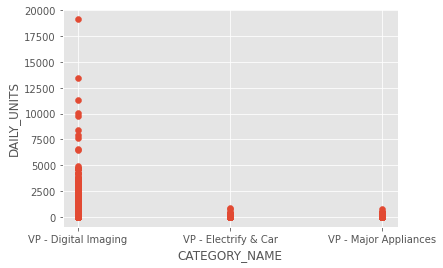

In [33]:
scatter(data, 'CATEGORY_NAME')

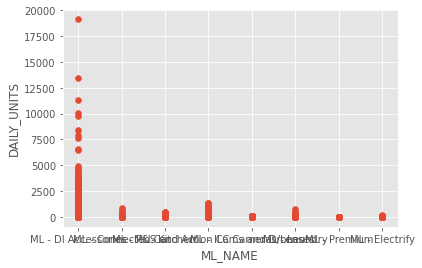

In [34]:
scatter(data, 'ML_NAME')

Text(0.5, 1.0, '\nBasic Time Series of Sales\n')

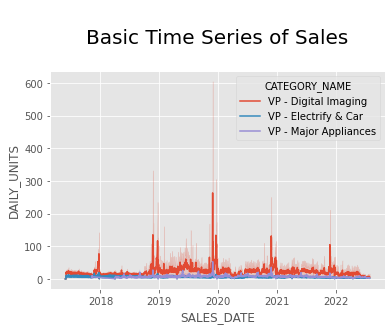

In [40]:
ax=sns.lineplot(data=data,x='SALES_DATE',y='DAILY_UNITS',hue='CATEGORY_NAME')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20)

In [43]:
#Hierachial 
# https://towardsdatascience.com/introduction-to-hierarchical-time-series-forecasting-part-ii-e73dfd3de86b

df_bottom_level = data.pivot(index="SALES_DATE", columns="Encoded_SKU_ID", values="DAILY_UNITS")
df_middle_level_1 = data.groupby(["SALES_DATE", "SUBCLASS_NAME"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="SALES_DATE", columns="SUBCLASS_NAME", values="DAILY_UNITS")
df_middle_level_2 = data.groupby(["SALES_DATE", "CLASS_NAME"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="SALES_DATE", columns="CLASS_NAME", values="DAILY_UNITS")
                    
df_middle_level_3 = data.groupby(["SALES_DATE", "ML_NAME"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="SALES_DATE", columns="ML_NAME", values="DAILY_UNITS")
                    
                    
df_middle_level_4 = data.groupby(["SALES_DATE", "CATEGORY_NAME"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="SALES_DATE", columns="CATEGORY_NAME", values="DAILY_UNITS")
df_total = data.groupby("SALES_DATE")["DAILY_UNITS"] \
             .sum() \
             .to_frame() \
             .rename(columns={"SALES_DATE": "DAILY_UNITS"})
                    

/var/folders/5z/ym67ykk95svfg00j5h5h6cgh0000gn/T/ipykernel_788/2432028265.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum() \
/var/folders/5z/ym67ykk95svfg00j5h5h6cgh0000gn/T/ipykernel_788/2432028265.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum() \
/var/folders/5z/ym67ykk95svfg00j5h5h6cgh0000gn/T/ipykernel_788/2432028265.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum() \
/var/folders/5z/y

In [49]:
df_bottom_level.fillna(0, inplace = True)
df_middle_level_1.fillna(0, inplace = True)
df_middle_level_2.fillna(0, inplace = True)
df_middle_level_3.fillna(0, inplace = True)
df_middle_level_4.fillna(0, inplace = True)
df_total.fillna(0, inplace = True)

In [64]:
df_bottom_level

Encoded_SKU_ID,1,2,3,4,5,6,7,8,9,10,...,566,567,568,569,570,571,572,573,574,575
SALES_DATE,,,,,,,,,,,,,,,,,,,,,
2017-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,0.0,5.0,2.0,0.0,3.0,5.0,0.0,2.0,1.0,1.0,...,8.0,1.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2022-07-28,2.0,5.0,0.0,0.0,3.0,8.0,0.0,6.0,0.0,3.0,...,4.0,3.0,2.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0
2022-07-29,2.0,3.0,0.0,0.0,2.0,13.0,0.0,7.0,1.0,3.0,...,7.0,4.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0


In [83]:
# join the DataFrames
hierarchy_df = pd.DataFrame()
hierarchy_df.index = pd.to_datetime(df_bottom_level.index)
hierarchy_df = df_bottom_level.merge(df_middle_level_1, on = 'SALES_DATE').merge(df_middle_level_2, on = 'SALES_DATE').merge(df_middle_level_3, on = 'SALES_DATE').merge(df_middle_level_4, on = 'SALES_DATE').merge(df_total, on = 'SALES_DATE')
                            

                


In [84]:
hierarchy_df

,1,2,3,4,5,6,7,8,9,10,...,ML - Electrify,ML - ILC Cameras/Lenses,ML - Kitchen,ML - Laundry,ML - P&S and Action Cams and Drones,ML - Premium,VP - Digital Imaging,VP - Electrify & Car,VP - Major Appliances,DAILY_UNITS
SALES_DATE,,,,,,,,,,,,,,,,,,,,,
2017-05-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,0.0,5.0,2.0,0.0,3.0,5.0,0.0,2.0,1.0,1.0,...,0.0,50.0,309.0,82.0,17.0,8.0,923.0,517.0,399.0,1839
2022-07-28,2.0,5.0,0.0,0.0,3.0,8.0,0.0,6.0,0.0,3.0,...,3.0,56.0,277.0,89.0,14.0,6.0,1021.0,466.0,372.0,1859
2022-07-29,2.0,3.0,0.0,0.0,2.0,13.0,0.0,7.0,1.0,3.0,...,1.0,61.0,313.0,116.0,14.0,14.0,1227.0,622.0,443.0,2292


In [90]:
print(f"Number of time series at the bottom level: {df_bottom_level.shape[1]}")
print(f"Number of time series at the middle1 level: {df_middle_level_1.shape[1]}")
print(f"Number of time series at the middle2 level: {df_middle_level_2.shape[1]}")
print(f"Number of time series at the middle3 level: {df_middle_level_3.shape[1]}")
print(f"Number of time series at the middle4 level: {df_middle_level_4.shape[1]}")
print(f"Number of time series at the total level: {df_total.shape[1]}")

Number of time series at the bottom level: 575
Number of time series at the middle1 level: 116
Number of time series at the middle2 level: 25
Number of time series at the middle3 level: 8
Number of time series at the middle4 level: 3
Number of time series at the total level: 1


<AxesSubplot: xlabel='SALES_DATE'>

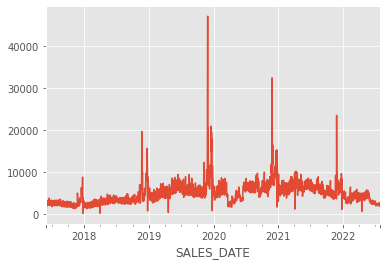

In [92]:
hierarchy_df['DAILY_UNITS'].plot()

In [93]:
data.head()



,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
25278,1,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0
477142,1,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0
105644,1,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0
557591,1,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0
175691,1,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,NaN,NaN,Fully-Stocked,0


In [105]:
sku = data["Encoded_SKU_ID"].unique()
subclass_name = data["SUBCLASS_NAME"].unique()
class_name = data["CLASS_NAME"].unique()
ml_name = data["ML_NAME"].unique()
category_name = data["CATEGORY_NAME"].unique()


data_hierarchy_pd = data[['Encoded_SKU_ID', 'SUBCLASS_NAME'	,'CLASS_NAME' ,	'ML_NAME'	, 'CATEGORY_NAME']].drop_duplicates()

# total = {'total': list(category_name)}
# state = {k: [v for v in regions if v.startswith(k)] for k in category_name}
# hierarchy = {**total, **state}

In [122]:
from collections import defaultdict

d = defaultdict(dict)

for i, row in data_hierarchy_pd.iterrows():
    d[row.CATEGORY_NAME][row.ML_NAME][row.CLASS_NAME][row.SUBCLASS_NAME][row.Encoded_SKU_ID] = 0 
    
    
    
#  row.drop(['Encoded_SKU_ID','SUBCLASS_NAME','CLASS_NAME' ,'ML_NAME','CATEGORY_NAME']).to_dict()    
    
# data_hierarchy_pd.groupby('CATEGORY_NAME')[['Encoded_SKU_ID', 'SUBCLASS_NAME'	,'CLASS_NAME' ,	'ML_NAME']].apply(lambda x: x.set_index('Encoded_SKU_ID')).to_dict(orient='index')

KeyError: 'ML - DI Accessories'

In [113]:
# data_hierarchy_pd.apply(lambda x: dict(zip(x['Encoded_SKU_ID'],x['SUBCLASS_NAME'],x['CLASS_NAME'],x['ML_NAME'],x['CATEGORY_NAME']))).to_dict()

In [123]:
ax = hierarchy_df[hierarchy['DAILY_UNITS']].plot(title="Trips - state level")
ax.legend(bbox_to_anchor=(1.0, 1.0));

NameError: name 'hierarchy' is not defined

In [6]:

# import scikit-hts
model_bu_arima = hts.HTSRegressor(model='auto_arima', revision_method='BU', n_jobs=0)
model_bu_arima = model_bu_arima.fit(hierarchy_df, hierarchy)
pred_bu_arima = model_bu_arima.predict(steps_ahead=4)

SyntaxError: invalid syntax (26240241.py, line 1)